# Datapipeline:

WARNING:

+ For the script to work the data files must be positiong in the data path of the repository.
Or the path to the data must be adapted accordingly. In this script all data must be in data_path
+ The *Data which is used : EU_all_current_shared.parquet* from Andreas preprocession.

Import the necessary libraries

0. Load the Data

* Load the data from a specified file using the appropriate function.
* Save the loaded data into a variable (called df) for further use.

1. Main data pipeline
Treat data to reach a point were we have the data frame ready for the separate treatments for classification and regression treatment

* 1.A: Omitting / deleting of variables which have no meaning for the model (explain why)
* 1.B: Omitting / deleting car identifiers because they are not relevant for the model
* 1.C: Omitting data before a certain year (explain why)
* 1.D: Treatment of outliers (explaing why)
    * Mean for gaussian like data
    * Other technique for non gaussian distributed data
* 1.E: Separation into electric cars and non electric cars (explain why)

2. Data pipeline for classification models
Prepare data so that it can be used for all basic classification models

* Loading data which has received the first/main data pipeline
*
*
*
* Separation into train and test data
* Scale data

3. Data pipeline for regression models
Prepare data so that it can be used for all basic regression models

* Loading data which has received the first/main data pipeline
*
*
*
* Separation into train and test data

4. Evaluation with baseline classification models

* Create different baselin models
* Train models
* Prediction
* Evaluation / Score

5. Evaluation with baseline regression models

* Create different baselin models
* Train models
* Prediction
* Evaluation / Score



# Importing necessary libraries

In [ ]:
# Import the required libraries

# Data manipulation and math operations
import pandas as pd
import numpy as np
import pyarrow.parquet as pq  # For working with parquet files

# Visualization libraries
import matplotlib.pyplot as plt  # For Matplotlib visualizations
import seaborn as sns            # For Seaborn visualizations
import plotly.express as px      # For interactive visualizations with Plotly
# %matplotlib inline  # Uncomment for Jupyter notebooks to display plots inline

# System libraries
import warnings
import os
# Ignore all warnings (useful for ignoring non-critical warnings)
warnings.filterwarnings("ignore")

# Machine Learning libraries
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from sklearn.preprocessing import OneHotEncoder, StandardScaler  # For encoding categorical variables and scaling features

# Regression model and evaluation
from sklearn.linear_model import LinearRegression  # For linear regression models
from sklearn.metrics import mean_squared_error  # For calculating mean squared error (MSE)

# Libraries for decision tree, random forest, and other machine learning models
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor  # For decision tree models (classification and regression)
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor  # For random forest models (classification and regression)
from sklearn.svm import SVC  # For Support Vector Classification
from sklearn.neighbors import KNeighborsClassifier  # For K-Nearest Neighbors classification
from sklearn.metrics import accuracy_score, classification_report  # For model evaluation (classification metrics)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 0. Additional functions in between: Load, Save, Inspect - DFs

In [ ]:
# Path to the neighboring 'data' folder in the local repository
data_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'data'))

# Define Loading data function for the local drive
def load_data_local(file_name, file_path):
    """
    Loads a parquet or csv file from the local directory.

    Parameters:
    file_name (str): The name of the file to load.
    file_path (str): The path to the directory where the file is located.

    Returns:
    pd.DataFrame: The loaded data as a pandas DataFrame.
    """
    # Full file path
    full_file_path = os.path.join(file_path, file_name)

    # Check file extension and load accordingly
    if file_name.endswith('.parquet'):
        print(f"Loading parquet file from local path: {full_file_path}")
        table = pq.read_table(full_file_path)
        df = table.to_pandas()  # Convert to pandas DataFrame
    elif file_name.endswith('.csv'):
        print(f"Loading csv file from local path: {full_file_path}")
        df = pd.read_csv(full_file_path)  # Read CSV into pandas DataFrame
    else:
        raise ValueError("Unsupported file format. Please provide a parquet or csv file.")

    return df


In [ ]:

# Define loading data function for the google drive
def load_data_gdrive(file_name, file_path, file_id):
    """
    Downloads a file from Google Drive by its file ID and loads a parquet or csv file.

    Parameters:
    file_name (str): The name to save the file as locally.
    file_path (str): The path to the directory where the file should be saved.
    file_id (str): The Google Drive file ID.

    Returns:
    pd.DataFrame: The loaded data as a pandas DataFrame.
    """
    # Google Drive file download URL format
    url = f'https://drive.google.com/uc?id={file_id}'

    # Full file path for saving
    full_file_path = os.path.join(file_path, file_name)

    # Download the file
    print(f"Downloading data from Google Drive (File ID: {file_id}) to: {full_file_path}")
    gdown.download(url, full_file_path, quiet=False)

    # Check file extension and load accordingly
    if file_name.endswith('.parquet'):
        print(f"Loading parquet file: {full_file_path}")
        table = pq.read_table(full_file_path)
        df = table.to_pandas()  # Convert to pandas DataFrame
    elif file_name.endswith('.csv'):
        print(f"Loading csv file: {full_file_path}")
        df = pd.read_csv(full_file_path)  # Read CSV into pandas DataFrame
    else:
        raise ValueError("Unsupported file format. Please provide a parquet or csv file.")

    return df

In [ ]:
# Define saving data function

# Example usage:
# save_data(df, 'my_data.csv', '/path/to/save')

def save_data(df, file_name, file_path):
    """
    Saves a pandas DataFrame as a CSV file to the specified path.

    Parameters:
    df (pd.DataFrame): The pandas DataFrame to save.
    file_name (str): The name of the CSV file to save (should end with .csv).
    file_path (str): The path to the directory where the file should be saved.

    Returns:
    None
    """
    # Full file path
    full_file_path = os.path.join(file_path, file_name)

    # Check if the file name ends with .csv
    if not file_name.endswith('.csv'):
        raise ValueError("File name should end with '.csv' extension.")

    # Save the DataFrame as CSV
    print(f"Saving DataFrame as a CSV file at: {full_file_path}")
    df.to_csv(full_file_path, index=False)

    print(f"CSV file saved successfully at: {full_file_path}")

0.C Define inspeciton function

In [ ]:
import pandas as pd

def inspect_data(df):
    """
    Function to perform an initial data inspection on a given DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to inspect.

    Returns:
    None
    """
    print("="*40)
    print("🚀 Basic Data Overview")
    print("="*40)

    # Print the shape of the DataFrame (rows, columns)
    print(f"🗂 Shape of the DataFrame: {df.shape[0]} rows, {df.shape[1]} columns")

    # Display the first 5 rows of the dataset
    print("\n🔍 First 5 rows of the DataFrame:")
    print(df.head(5))

    # Get information about data types, missing values, and memory usage
    print("\n📊 DataFrame Information:")
    df.info()

    # Show basic statistics for numeric columns
    print("\n📈 Summary Statistics of Numeric Columns:")
    print(df.describe())

    # Count missing values and display
    print("\n❓ Missing Values Overview:")
    missing_df = count_missing_values(df)
    print(missing_df)

    # Print unique values for categorical and object columns
    print("\n🔑 Unique Values in Categorical/Object Columns:")
    print_unique_values(df)

def count_missing_values(df):
    """
    Function to count missing values and provide an overview of each column.

    Parameters:
    df (pd.DataFrame): The DataFrame to inspect.

    Returns:
    pd.DataFrame: DataFrame with missing value counts, data types, and percentages.
    """
    missing_counts = {}

    for col in df.columns:
        # Count missing values (NaN)
        missing_count = df[col].isna().sum()

        # Store the results
        missing_counts[col] = {
            'Dtype': df[col].dtype.name,
            'Missing Count': missing_count,
            'Percent Missing': f"{missing_count / len(df) * 100:.2f}%"
        }

    # Convert the results to a DataFrame for easier viewing
    result_df = pd.DataFrame(missing_counts).T
    result_df = result_df[['Dtype', 'Missing Count', 'Percent Missing']]

    return result_df

def print_unique_values(df):
    """
    Function to print the number of unique values for categorical and object columns.

    Parameters:
    df (pd.DataFrame): The DataFrame to inspect.

    Returns:
    None
    """
    cat_obj_cols = df.select_dtypes(include=['category', 'object']).columns
    unique_counts = {}

    for col in cat_obj_cols:
        unique_counts[col] = df[col].nunique()

    if unique_counts:
        for col, count in unique_counts.items():
            print(f"Column '{col}' has {count} unique values")
    else:
        print("No categorical or object columns found.")


# 1. Main data pipeline

In [ ]:
# Missing the preprocessing work from andreas
Andreas vorschritte von daten satz wie es von der EU seite kommt -> parquet file

In [ ]:
# The beginning of each section
# Loading the data frame
# Inspect the data frame
df = load_data_local('EU_all_current_shared.parquet', data_path)

inspect_data(df)

# 1.V Drop all data that does not contain target variable Ewltp (g/km)

In [ ]:
# Drop rows where all values in 'Ewltp (g/km)' are NaN
df.dropna(subset=['Ewltp (g/km)'], inplace=True)

# 1. W Declare all columns which should be deleted/omitted, explain why and delete them

In [ ]:
# Delete columns without meaning for the model
print(df.columns)

# List of columns to be dropped because they are pure car identifiers and have no technical meaning
car_identifiers = ['Ve', 'Va', 'T', 'Tan', 'VFN', 'ID']

administrative_values = ['Date of registration', 'Status']

data_related_columns = ['r', '#identical occurences']

brand_related = ['Mp', 'Mh', 'Man', 'MMS']

# Different measurement or to much correlation (fuel consumation)
correlated_with_target = ['Enedc (g/km)','Ernedc (g/km)', 'Erwltp (g/km)','Fuel consumption ']

# Put them together
list_columns_drop = car_identifiers + administrative_values + data_related_columns + brand_related + correlated_with_target

# Filter only the columns that exist in the DataFrame
existing_columns_to_drop = [col for col in list_columns_drop if col in df.columns]

# Drop the existing columns
if existing_columns_to_drop:
    df.drop(existing_columns_to_drop, axis=1, inplace=True)
    print(f"Dropped columns: {existing_columns_to_drop}")
else:
    print("No columns to drop were found in the DataFrame.")

# Display the updated DataFrame
print(df.columns)

# 1.X Identify electric cars
+ identify electric (or hybrid) cars by looking at electric range and electric capacity
+ making separate column whichs marks the non electric cars
+ fill then all the nan values in electri range and electric capacity with 0 (because they have non, which is equal to 0)
+ ANNOTATION: Open for discussion with the Team

In [ ]:
# If there is a NaN in Electric range or a NaN in z
# Create the Non_Electric column: 1 if both Electric range OR z (Wh/km) are NaN, otherwise 0
df['Non_Electric_Car'] = (df['Electric range (km)'].isna() & df['z (Wh/km)'].isna()).astype(int)

# Fill NaN values in Electric range (km) and z (Wh/km) with 0
df['Electric range (km)'].fillna(0, inplace=True)
df['z (Wh/km)'].fillna(0, inplace=True)

In [ ]:
# Display the updated DataFrame
count_missing_values(df)

# 1.Y Outlier Handling

+ Input Andreas: Outlier rausschmeißen oder median einfüllen
+ Outlier handling function (IQR factor ab dem als Outlier gewertet wird)
+ Zusätzlich in die Funktion: ersetzen durch median oder row delete

# Place gaussian like distribution test here if there is one

In [ ]:
# Linear models assume normality of the data.
# Instead of performing slow Gaussian-like distribution tests, we will visualize the distributions.

# Select only the numerical columns of type float64, float32, and int64
numb_columns = df.select_dtypes(include=['float64', 'float32', 'int64']).columns

# Plot histograms to visualize the distribution of each numerical column
plt.figure(figsize=(15, 10))  # Set the figure size
for i, column in enumerate(numb_columns, 1):
    plt.subplot(len(numb_columns) // 3 + 1, 3, i)  # Create subplots (3 columns per row)
    sns.histplot(df[column], kde=True)  # Plot histogram with a KDE (Kernel Density Estimate)
    plt.title(f'Distribution of {column}')  # Add title to each subplot
    plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plots

In [ ]:
# Since the near gaussian distribution test is not working I am declaring them by visual:
gaussian_cols = ['m (kg)', 'Mt',  'W (mm)', 'At1 (mm)', 'At2 (mm)']
non_gaussian_cols = [ 'ec (cm3)', 'ep (KW)']

In [ ]:
# Assuming gaussian_cols is already defined (e.g., from the Shapiro-Wilk test)
# Replace outliers in Gaussian-distributed columns with the median value of those columns.

# Calculate the first (Q1) and third (Q3) quartiles for the specified Gaussian columns
Q1 = df[gaussian_cols].quantile(0.25)
Q3 = df[gaussian_cols].quantile(0.75)
IQR = Q3 - Q1  # Calculate the Interquartile Range (IQR)

# Define conditions to identify outliers based on the IQR method
# An outlier is defined as a value that is less than (Q1 - 1.5 * IQR) or greater than (Q3 + 1.5 * IQR)
outlier_condition = ((df[gaussian_cols] < (Q1 - 1.5 * IQR)) |
                     (df[gaussian_cols] > (Q3 + 1.5 * IQR)))

# Replace outliers with the median value of their respective columns
for col in gaussian_cols:
    median_value = df[col].median()  # Calculate the median for the current column
    df.loc[outlier_condition[col], col] = median_value  # Replace identified outliers with the median

# Print the shape of the DataFrame after replacing outliers
print(f"DataFrame shape after replacing outliers in Gaussian columns: {df.shape}")

In [ ]:
# Function to remove outliers from non-Gaussian distributed columns using the IQR method
def iqr_outlier_removal(df):
    # Create a copy of the DataFrame to avoid modifying the original
    outliers_removed = df.copy()

    # Iterate over each column in the DataFrame
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):  # Process only numeric columns
            # Calculate the first (Q1) and third (Q3) quartiles
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1  # Calculate the Interquartile Range (IQR)

            # Define lower and upper bounds for outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Cap outliers outside the defined range
            outliers_removed[col] = np.where(df[col] < lower_bound, lower_bound,  # Cap lower outliers
                                             np.where(df[col] > upper_bound, upper_bound, df[col]))  # Cap upper outliers

    return outliers_removed  # Return the modified DataFrame with outliers removed

# Apply the function to your DataFrame
df = iqr_outlier_removal(df[non_gaussian_cols])  # Create a new DataFrame without outliers

In [ ]:
# Saving data before the next pipline steps
# Example usage:
# save_data(df, 'my_data.csv', '/path/to/save')

save_data(df = df, file_name = 'Data_Preprocessed_Step1.csv', file_path = data_path)

In [ ]:

# The beginning of each section
# Loading the data frame

# Inspect the data frame
df = load_data_local('EU_all_current_shared.parquet', alex_path)


alex_path = r'C:\Users\alexa\Downloads\aug24_bds_int---co2\data' #Alex path
# Call the function to inspect your DataFrame
inspect_data(df)

# 2. Regression model (Alex)

0- Visualize the stand of the data set so far (check summary)- save sub-path

1- Further Data Preprocessing (if needed after the big one already done):

- Handel removal of variables
- Handle missing values, if any (impute or drop).
- Encode categorical variables.

2- Define the Target and Features:

- Separate the target variable (dependent variable) and the features (independent variables).

3- Train-Test Split:

- Split the data into training and testing sets to evaluate model performance on unseen data.

- Normalize or standardize the features (for algorithms sensitive to feature scaling, like Ridge or Lasso).

4- Fit/Train the Regression Model:

- Choose the regression algorithm (Linear Regression, Decision Trees, Random Forest).
- Train the model using the training set.

5-Evaluate the Model:

- Use the test set to make predictions.
- Compute evaluation metrics like R-squared and Mean Squared Error (MSE).

6- Cross-Validation:

- cross-validation to assess the stability of the model across different subsets of the data.

7- Interpret Results:

- Compare training vs. test set performance.
- Check for overfitting or underfitting.

8 - Compare performance of different models

In [ ]:
# The global preprocessing is not done yet (Sunday, Oct 20), so in order not to be stuck, I need to work with my own data and preprocessing.
# Also, I dont get how the download of the most updated dataset is performed above. (the first Andreas one, but loading it up from here. This can be changed later: EU_all_current_shared.parquet)
# I will also load here libaries, so that I dont need to run the cells above

# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# enabling the display of all columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# reading the file

df=pd.read_parquet(r'C:\Users\alexa\Downloads\ProjectCO2--no Gibhub\EU_Alex\Data\EU all_current_shared.parquet')

# Filter data from 2018 to 2023
df = df[df['year'].between(2018, 2023)]


In [ ]:
# Check summary

# enabling the display of all columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Get the data types of each column
data_types = df.dtypes

# Get the number of unique values for each categorical column
unique_values = df.select_dtypes(include=['int64', 'float64', 'object', 'category', 'bool']).nunique()

# Get the percentage of missing values for each column
missing_values = df.isnull().mean() * 100

# Combine the information into a DataFrame
summary_df = pd.DataFrame({
    'Data Type': data_types,
    'Unique Values': unique_values,
    'Missing Values (%)': missing_values
})

# Sort the summary DataFrame by the percentage of missing values in descending order
summary_df = summary_df.sort_values(by='Missing Values (%)', ascending=False)

# Print the summary DataFrame
print(summary_df)

# Display the cleaned DataFrame shape
print(df.shape)

                      Data Type  Unique Values  Missing Values (%)
De                      float32            NaN           97.152324
ech                    category           36.0           96.064264
RLFI                   category         1544.0           93.401949
Electric range (km)     float32            NaN           90.456573
Vf                      float32            NaN           90.035902
z (Wh/km)               float32            NaN           88.790867
Ernedc (g/km)           float32            NaN           84.529493
Erwltp (g/km)           float32            NaN           75.248403
Fuel consumption        float32            NaN           65.376148
IT                     category         1864.0           58.082522
Date of registration   category         1095.0           54.366251
MMS                    category         1607.0           48.783678
Enedc (g/km)            float32            NaN           44.847890
VFN                    category        29048.0           26.61

Colums to exclude from the analysis: De, ech, RLFI, Vf, Ct, Cn, Cr, IT, Non_Electric_Car, Electric range (km),z (Wh/km)

- Deviation factor (DE): In order to understand the DE, one has first to understand the context:

** CO2MPAS is a vehicle simulation model for the calculation of CO2 emissions, energy, and fuel consumption from passenger cars and light commercial vehicles. It uses experimental data, retrieved from chassis dyno or on-road tests, to simulate the operation of vehicles under different operating conditions.The CO2MPAS model is able to provide the difference in CO2 emissions under the two different test procedures.

The WLTP is the new and more realistic procedure for the emission type-approval of light duty vehicles which replaces the old and outdated NEDC procedure starting from 2017. The use CO2MPAS for the purpose of correlating CO2 emissions determined on the NEDC and the WLTP is set out in Commission Implementing Regulations (EU) 2017/1152 (light commercial vehicles) and 2017/1153 (passenger cars).

The correlation of CO2 emission values is required to ensure a transition from NEDC based CO2 emission targets to targets based on WLTP emissions under Regulation (EU) 2019/631 setting out CO2 emission performance standards for light duty vehicles.

In order to ensure that the correlated NEDC values are correct, 10% of the vehicle interpolation families that are subject to a CO2MPAS simulation are randomly selected for a physical vehicle test, using the “DICE” module of
CO2MPAS. For each such test, a deviation factor (De) should be calculated and recorded in the type approval certificate and the certificate of conformity.

** The De expresses the deviation between the CO2 emissions determined through the physical vehicle test and the CO2 emissions declared by the manufacturer in view of the CO2MPAS simulation.

If, for one or more interpolation families of a manufacturer, the De is higher than 0.04, this triggers the calculation of a correction factor, by which the average specific CO2 emissions of the manufacturer will be multiplied.

Nearly all values are missing.

- ech und RLFI: Meaning is not clear and nearly all values missing.

- Verification factor (Vf): The application of a correction factor may also be triggered by the presence of a verification factor (Vf) of 1 for one or more interpolation families of a manufacturer. The Vf is recorded
as “1” in the type approval certificate if the type approval authority finds that the input data for the correlation procedure as reported by the manufacturer were incorrect or where it has justified reasons to deem the CO2 value declared by the manufacturer to be too low. - Most of verification factors since 2018 are 1


- Commercial name(Cn): A vehicle identifier. This is a categorical variable. It is interesting that in previous analyses the same car sold accross different countries show significant difference in Ewltp emissions. However,
the data quality is low, and with nearly 30.000 uniques values, it would pose a challenge for encoding.

- Category of vehicle type approved (Ct) and Category of vehicle registered (Cr): Here the Cr superseeds Ct. But it is irrelevant at the end, since ALL the data set is of the category M1 (light passenger vehicles )  


                              Columns to be temporarily excluded for modeling exercise (other team members may want to work with this part):

IT: Code for the use of eco-innovation technologies. Types are Lights,Alternators, Thermal,Kinetic, Solar, etc (see pager Eco-Innovations, 2018). However, the coding is unclear.(Erwltp (g/km) was already removed by Tillman/ Andreas)

Mk: Make
Z: Electric energy consumption

___ NOT SURE WHERE THIS IS COMING FROM

- Non_Electric_Car: only one unique value.

In [ ]:
# List of columns to be exclude from analysis

columns_to_remove = [
    'De',
    'ech',
    'RLFI',
    'Electric range (km)',
    'Vf',
    'z (Wh/km)',
    'Ernedc (g/km)',
    'Erwltp (g/km)',
    'IT',
    'Date of registration',
    'MMS',
    'Enedc (g/km)',
    'VFN',
    'Mp',
    'Ve',
    'Cr',
    'Cr',
    'Tan',
    'Va',
    'Cn',
    'Ct',
    'Mk',
    'T',
    'Man',
    'Status',
    'ID',
    'r',
    '#identical occurences'

]

# Exclude
df_reg = df.drop(columns=columns_to_remove, errors='ignore')


In [ ]:
# Check summary

# Get the data types of each column
data_types = df_reg.dtypes

# Get the number of unique values for each categorical column
unique_values = df_reg.select_dtypes(include=['int64', 'float64', 'object', 'category', 'bool']).nunique()

# Get the percentage of missing values for each column
missing_values = df_reg.isnull().mean() * 100

# Combine the information into a DataFrame
summary_df_reg = pd.DataFrame({
    'Data Type': data_types,
    'Unique Values': unique_values,
    'Missing Values (%)': missing_values
})

# Sort the summary DataFrame by the percentage of missing values in descending order
summary_df_reg = summary_df_reg.sort_values(by='Missing Values (%)', ascending=False)

# Print the summary DataFrame
print(summary_df_reg)

# Show the shape of the original DataFrame
df_reg.shape

                  Data Type  Unique Values  Missing Values (%)
Fuel consumption    float32            NaN           65.376148
At2 (mm)            float32            NaN           18.305667
At1 (mm)            float32            NaN           18.196410
W (mm)              float32            NaN           16.045285
Mt                  float32            NaN            7.400086
Ewltp (g/km)        float32            NaN            5.210578
ec (cm3)            float32            NaN            4.625855
ep (KW)             float32            NaN            4.240944
m (kg)              float32            NaN            0.032387
Ft                 category            9.0            0.015052
Fm                 category            6.0            0.006075
Country            category           30.0            0.000000
Mh                 category          160.0            0.000000
year                float32            NaN            0.000000


(11473813, 14)

In [ ]:
# Dealing with missing values

# W, At1 and At2 follow roughly a normal distribution. Ergo missing values can be replaced with the mean
# Ec, Ep, Fuel consumption are skewed. Missing values will be replace with the median.

df_reg['W (mm)'] = df_reg['W (mm)'].fillna(df_reg['W (mm)'].mean())
df_reg['At1 (mm)'] = df_reg['At1 (mm)'].fillna(df_reg['At1 (mm)'].mean())
df_reg['At2 (mm)'] = df_reg['At2 (mm)'].fillna(df_reg['At2 (mm)'].mean())

# Removing rows with missing values

# List of columns to check for missing values
columns_to_check = ['ec (cm3)', 'ep (KW)', 'Mt', 'm (kg)', 'Fm', 'Ft', 'Fuel consumption ', 'Ewltp (g/km)']

# Remove rows with missing values in specified columns
df_reg = df_reg.dropna(subset=columns_to_check)

In [ ]:
# Get the data types of each column
data_types = df_reg.dtypes

# Get the number of unique values for each categorical column
unique_values = df_reg.select_dtypes(include=['int64', 'float64', 'float32','object', 'category', 'bool']).nunique()

# Get the percentage of missing values for each column
missing_values = df_reg.isnull().mean() * 100

# Combine the information into a DataFrame
summary_df_reg = pd.DataFrame({
    'Data Type': data_types,
    'Unique Values': unique_values,
    'Missing Values (%)': missing_values
})

# Sort the summary DataFrame by the percentage of missing values in descending order
summary_df_reg = summary_df_reg.sort_values(by='Missing Values (%)', ascending=False)

# Print the summary DataFrame
print(summary_df_reg)

# Show the shape of the original DataFrame
df_reg.shape

                  Data Type  Unique Values  Missing Values (%)
Country            category             26                 0.0
Mh                 category             82                 0.0
m (kg)              float32           2063                 0.0
Mt                  float32           2191                 0.0
Ewltp (g/km)        float32            400                 0.0
W (mm)              float32            662                 0.0
At1 (mm)            float32           1301                 0.0
At2 (mm)            float32           1303                 0.0
Ft                 category              7                 0.0
Fm                 category              5                 0.0
ec (cm3)            float32            166                 0.0
ep (KW)             float32            291                 0.0
year                float32              3                 0.0
Fuel consumption    float32            372                 0.0


(3838945, 14)

Now that some columns were removed and missing values have been dealt with, let's check categorical columns for unique values

In [ ]:
# From df_reg
categorical_cols = ['Fm', 'Ft']

# Loop through each categorical column and print unique values
for col in categorical_cols:
    unique_values = df_reg[col].unique()
    print(f"Unique values in '{col}': {list(unique_values)}")

# Meaning Ft

# E85: an ethanol fuel blend of 85% ethanol fuel and 15% gasoline or other hydrocarbon by volume
# LPG: liquified petroleum gas
# NG: Natural Gas

# Meaning Fm
# M = Monofuel
# P = Off vehicle charging hybrid electric vehicles
# B = Bi-fuel vehicles (two separate fuel storage systems)
# H = Not-off vehicle charging hybrid vehicles
# F = Flex-fuel vehicles


Unique values in 'Fm': ['M', 'P', 'B', 'H', 'F']
Unique values in 'Ft': ['PETROL', 'DIESEL', 'PETROL/ELECTRIC', 'LPG', 'DIESEL/ELECTRIC', 'NG-BIOMETHANE', 'E85']


In [ ]:
# From df_reg
categorical_cols = ['Country', 'Mh']

# Loop through each categorical column and print unique values
for col in categorical_cols:
    unique_values = df_reg[col].unique()
    print(f"Unique values in '{col}': {list(unique_values)}")

Unique values in 'Country': ['DE', 'PL', 'FR', 'BE', 'IE', 'NO', 'HR', 'LV', 'IT', 'CZ', 'SI', 'EE', 'BG', 'ES', 'HU', 'NL', 'FI', 'LT', 'AT', 'LU', 'PT', 'SK', 'SE', 'IS', 'MT', 'GR']
Unique values in 'Mh': ['PSA', 'AA-IVA', 'AUDI AG', 'RENAULT', 'SKODA', 'FORD WERKE GMBH', 'TOYOTA', 'BMW AG', 'HYUNDAI', 'MAZDA', 'SEAT', 'HYUNDAI CZECH', 'KIA SLOVAKIA', 'AUTOMOBILES PEUGEOT', 'VOLKSWAGEN', 'VOLVO', 'MAGYAR SUZUKI', 'FIAT GROUP', 'KIA', 'SUZUKI MOTOR CORPORATION', 'NISSAN', 'AUDI SPORT', 'AUTOMOBILES CITROEN', 'MERCEDES-BENZ AG', 'ALFA ROMEO', 'DACIA', 'JAGUAR LAND ROVER LIMITED', 'HONDA MOTOR CO', 'MITSUBISHI MOTORS THAILAND', 'OPEL AUTOMOBILE', 'MITSUBISHI MOTORS CORPORATION', 'HYUNDAI ASSAN', 'BMW GMBH', 'PORSCHE', 'CHRYSLER', 'SUBARU', 'FORD MOTOR COMPANY', 'SSANGYONG', 'MAZDA EUROPE', 'BENTLEY', 'DUPLICATE', 'MCLAREN', 'MASERATI', 'LAMBORGHINI', 'ALPINA', 'ALPINE', 'MERCEDES AMG', 'FERRARI', 'ROLLS ROYCE', 'ASTON MARTIN', 'AA-NSS', 'DFSK', 'LOTUS', 'AUDI HUNGARIA', 'CATERHAM', 'NI

Let's handle first countries



Country
DE    42.234833
FR    53.281722
IT    62.449527
BE    69.811602
PL    76.919544
Name: count, dtype: float64


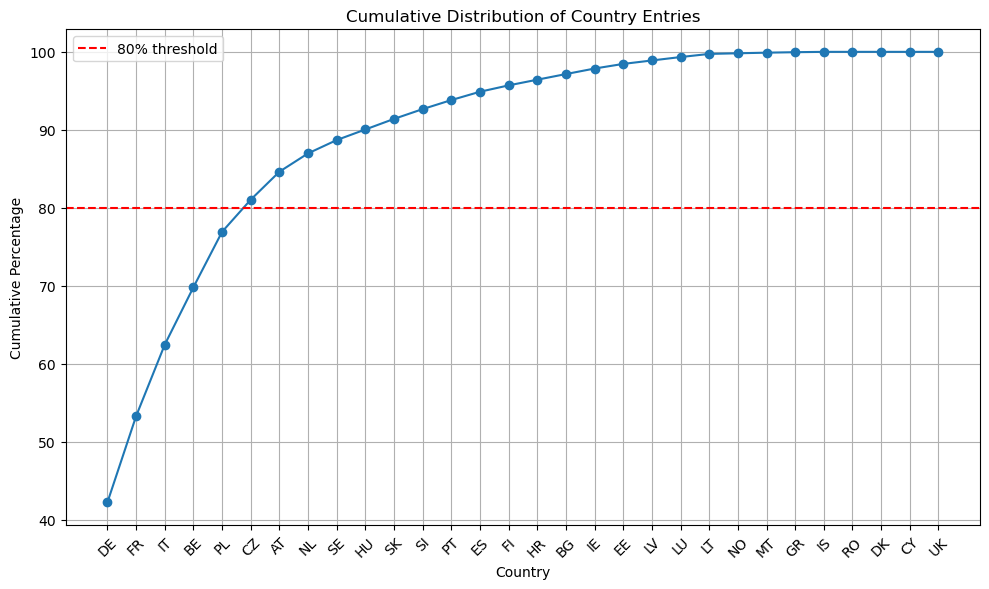

In [ ]:
# Check Which Countries Form 80% of the Data
# Calculate the frequency of each country

country_counts = df_reg['Country'].value_counts()

# Calculate the cumulative percentage of entries for each country
country_percentage = (country_counts / country_counts.sum()).cumsum() * 100

# Filter to get the countries that form the first 80% of entries
countries_80_percent = country_percentage[country_percentage <= 80]

# Print the countries and their cumulative percentages
print(countries_80_percent)

# Visualize the cumulative distribution of countries
plt.figure(figsize=(10, 6))
plt.plot(country_percentage.index, country_percentage.values, marker='o', linestyle='-')
plt.axhline(80, color='r', linestyle='--', label='80% threshold')
plt.xticks(rotation=45)
plt.title('Cumulative Distribution of Country Entries')
plt.xlabel('Country')
plt.ylabel('Cumulative Percentage')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#We can retain the countries forming 80% of the data and drop the rest. Thereby reducing significantly the number of extra columns that encoding will produce

In [ ]:
# List of countries to retain
countries_to_keep = ['DE', 'FR', 'IT', 'BE', 'PL', 'CZ']

# Filter the DataFrame to retain only rows where 'Country' is in the list of countries_to_keep
df_regC = df_reg[df_reg['Country'].isin(countries_to_keep)]

# Check the shape of the filtered DataFrame to ensure the filtering worked
print("Shape of the filtered DataFrame:", df_regC.shape)

Shape of the filtered DataFrame: (3111097, 14)


In [ ]:
# Check that changes were done via summary

# Get the data types of each column
data_types = df_regC.dtypes

# Get the number of unique values for each categorical column
unique_values = df_regC.select_dtypes(include=['int64', 'float64', 'float32','object', 'category', 'bool']).nunique()

# Get the percentage of missing values for each column
missing_values = df_regC.isnull().mean() * 100

# Combine the information into a DataFrame
summary_df_regC = pd.DataFrame({
    'Data Type': data_types,
    'Unique Values': unique_values,
    'Missing Values (%)': missing_values
})

# Sort the summary DataFrame by the percentage of missing values in descending order
summary_df_regC = summary_df_regC.sort_values(by='Missing Values (%)', ascending=False)

# Print the summary DataFrame
print(summary_df_regC)

# Show the shape of the original DataFrame
df_regC.shape

                  Data Type  Unique Values  Missing Values (%)
Country            category              6                 0.0
Mh                 category             77                 0.0
m (kg)              float32           2016                 0.0
Mt                  float32           2149                 0.0
Ewltp (g/km)        float32            391                 0.0
W (mm)              float32            629                 0.0
At1 (mm)            float32           1300                 0.0
At2 (mm)            float32           1301                 0.0
Ft                 category              7                 0.0
Fm                 category              5                 0.0
ec (cm3)            float32            134                 0.0
ep (KW)             float32            261                 0.0
year                float32              3                 0.0
Fuel consumption    float32            245                 0.0


(3111097, 14)

Let'handel Mh (Manufacturer): The official name give by the EU contains subsidiaries and regional entities, i.a., MAGYAR SUZUKI, SUZUKI THAILAND, and MARUTI.
I will try to gropu subsidiaries, divisions, or regional branches under their parent company name, so as to reduce noise and make the data more consistent. This approach should simplify the dataset and helps avoid biases introduced by having the same entity represented under multiple names.

In [ ]:
# Mapping

automaker_mapping = {
    'FORD WERKE GMBH': 'ford',
    'FORD INDIA': 'ford',
    'FORD MOTOR COMPANY': 'ford',
    'FORD MOTOR AUSTRALIA': 'ford',
    'BMW AG': 'BMW',
    'BMW GMBH': 'BMW',
    'AUDI AG': 'audi',
    'AUDI SPORT': 'audi',
    'AUDI HUNGARIA': 'audi',
    'SUZUKI MOTOR CORPORATION': 'suzuki',
    'MAGYAR SUZUKI': 'suzuki',
    'SUZUKI THAILAND': 'suzuki',
    'MARUTI SUZUKI': 'suzuki',
    'TOYOTA': 'toyota',
    'TOYOTA MOTOR CORPORATION': 'toyota',
    'TOYOTA GAZOO RACING': 'toyota',
    'ROLLS ROYCE': 'rolls-royce',
    'ROLLS-ROYCE': 'rolls-royce',
    'STELLANTIS AUTO': 'stellantis',
    'STELLANTIS EUROPE': 'stellantis',
    'MAZDA': 'mazda',
    'MAZDA EUROPE': 'mazda',
    'HYUNDAI' : 'hyundai',
    'HYUNDAI CZECH' : 'hyundai',
    'HYUNDAI EUROPE': 'hyundai',
    'HONDA UK': 'honda',
    'HONDA MOTOR CO': 'honda',
    'HONDA TURKIYE': 'honda',
    'HYUNDAI ASSAN':'hyundai',
    'MITSUBISHI MOTORS CORPORATION':'mitsubishi',
    'MITSUBISHI MOTORS THAILAND': 'mitshubishi',
    'MERCEDES-BENZ AG' : 'mercedes',
    'MERCEDES AMG': 'mercedes',
    'KIA SLOVAKIA': 'kia',
    'KIA': 'kia',
    'OPEL': 'opel',
    'OPEL AUTOMOBILE': 'opel',
    'NISSAN': 'nissan',
    'NISSAN AUTOMOTIVE EUROPE': 'nissan'}


# Apply the mapping
df_regC['Mh'] = df_regC['Mh'].replace(automaker_mapping)


C:\Users\alexa\AppData\Local\Temp\ipykernel_14856\3086648816.py:46: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_regC['Mh'] = df_regC['Mh'].replace(automaker_mapping)
C:\Users\alexa\AppData\Local\Temp\ipykernel_14856\3086648816.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regC['Mh'] = df_regC['Mh'].replace(automaker_mapping)


In [ ]:
# Find any automakers that are not in the mapping
unmapped_automakers = df_regC[~df['Mh'].isin(automaker_mapping.values())]['Mh'].unique()
print(unmapped_automakers)

C:\Users\alexa\AppData\Local\Temp\ipykernel_14856\2782229607.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unmapped_automakers = df_regC[~df['Mh'].isin(automaker_mapping.values())]['Mh'].unique()


['PSA', 'AA-IVA', 'audi', 'RENAULT', 'SKODA', ..., 'KG MOBILITY', 'INEOS', 'KTM', 'GREAT WALL MOTOR', 'OUT OF SCOPE']
Length: 62
Categories (238, object): ['AA-IVA', 'AA-NSS', 'AC CARS', 'ADIDOR', ..., 'ZHEJIANG HAOQING', 'ZOTYE HOLDING NG GROUP', 'ZOYTE', 'duplicate']


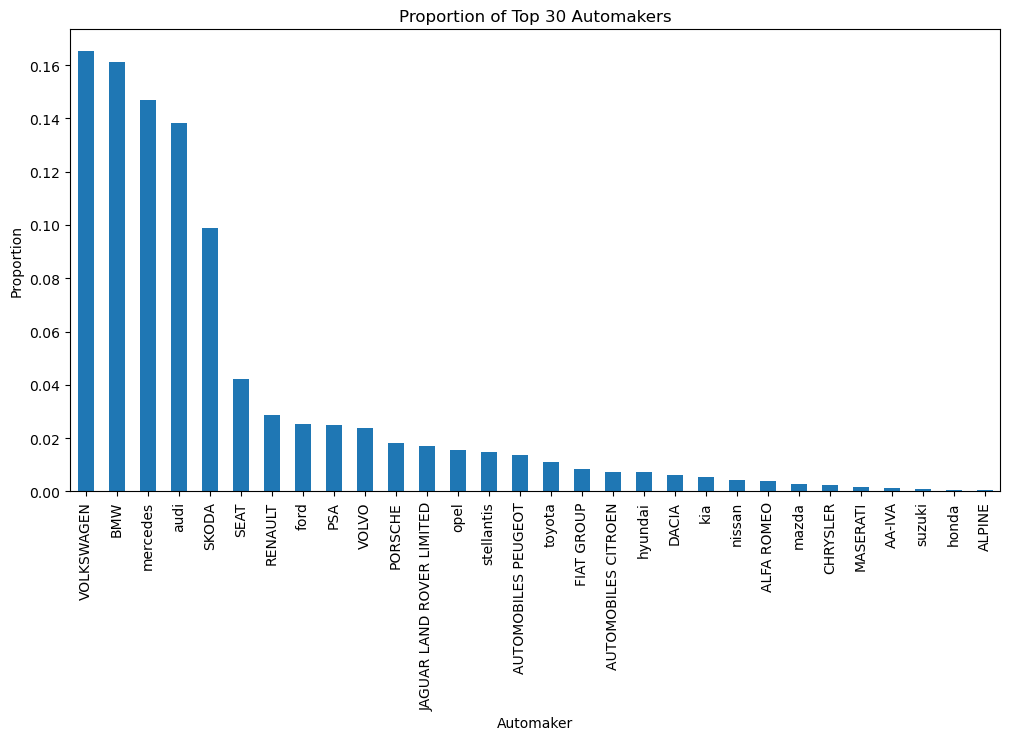

In [ ]:
#Before making further mappings, let's check the the top 30 automakers by proportion
automaker_proportions = df_regC['Mh'].value_counts(normalize=True).head(30)

# Create a bar plot for the top 30 automakers
plt.figure(figsize=(12, 6))
automaker_proportions.plot(kind='bar')
plt.title('Proportion of Top 30 Automakers')
plt.xlabel('Automaker')
plt.ylabel('Proportion')
plt.xticks(rotation=90)
plt.show()

Mh
VOLKSWAGEN    16.553173
BMW           32.708362
mercedes      47.417612
audi          61.272422
SKODA         71.187691
SEAT          75.431955
RENAULT       78.315232
Name: count, dtype: float64


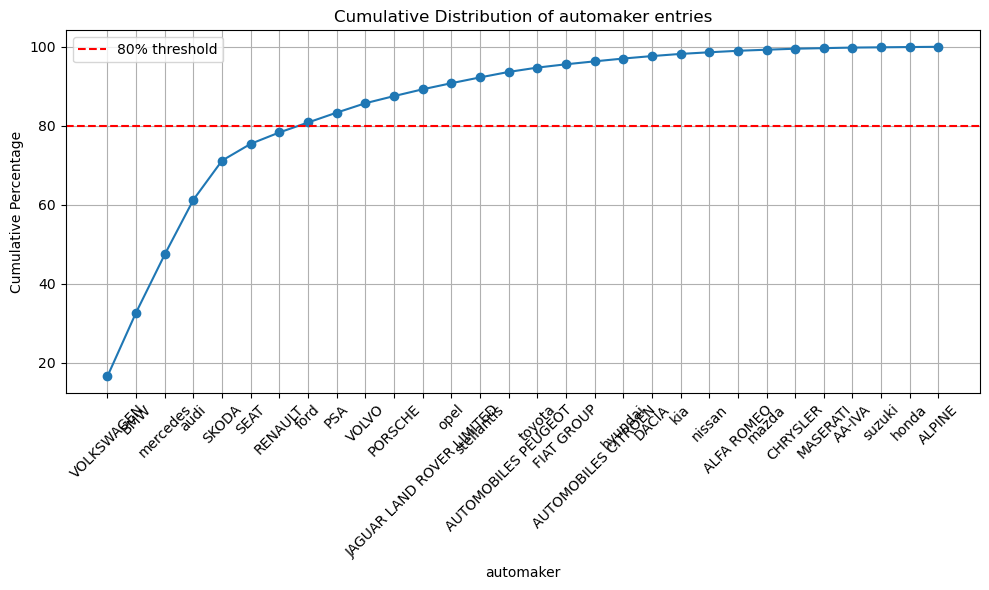

(3111097, 14)

In [ ]:
# Now let's check the importance of the automakers that form 80% of the Data
# Calculate the frequency of each country

automaker_counts = df_regC['Mh'].value_counts().head(30)

# Calculate the cumulative percentage of entries for each country
automaker_percentage = (automaker_counts/ automaker_counts.sum()).cumsum() * 100

# Filter to get the countries that form the first 80% of entries
automaker_80_percent = automaker_percentage[automaker_percentage <= 80]

# Print the countries and their cumulative percentages
print(automaker_80_percent)

# Visualize the cumulative distribution of countries
plt.figure(figsize=(10, 6))
plt.plot(automaker_percentage.index, automaker_percentage.values, marker='o', linestyle='-')
plt.axhline(80, color='r', linestyle='--', label='80% threshold')
plt.xticks(rotation=45)
plt.title('Cumulative Distribution of automaker entries')
plt.xlabel('automaker')
plt.ylabel('Cumulative Percentage')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#We can retain the am forming 80% of the data and drop the rest. Thereby reducing significantly the number of extra columns that encoding will produce

df_regC.shape

In [ ]:
# We retain the first 8

# List of automakers to retain
automakers_to_keep = ['VOLKSWAGEN', 'BMW', 'mercedes', 'audi', 'SKODA', 'SEAT', 'RENAULT', 'ford']

# Filter the DataFrame to retain only rows where 'Country' is in the list of countries_to_keep
df_regCA = df_regC[df_regC['Mh'].isin(automakers_to_keep)]

# Check the shape of the filtered DataFrame to ensure the filtering worked
print("Shape of the filtered DataFrame:", df_regCA.shape)

Shape of the filtered DataFrame: (2509130, 14)


In [ ]:
# Check that changes were done via summary

# Get the data types of each column
data_types = df_regCA.dtypes

# Get the number of unique values for each categorical column
unique_values = df_regCA.select_dtypes(include=['int64', 'float64', 'float32','object', 'category', 'bool']).nunique()

# Get the percentage of missing values for each column
missing_values = df_regCA.isnull().mean() * 100

# Combine the information into a DataFrame
summary_df_regCA = pd.DataFrame({
    'Data Type': data_types,
    'Unique Values': unique_values,
    'Missing Values (%)': missing_values
})

# Sort the summary DataFrame by the percentage of missing values in descending order
summary_df_regCA = summary_df_regCA.sort_values(by='Missing Values (%)', ascending=False)

# Print the summary DataFrame
print(summary_df_regCA)

# Show the shape of the original DataFrame
df_regCA.shape

                  Data Type  Unique Values  Missing Values (%)
Country            category              6                 0.0
Mh                 category              8                 0.0
m (kg)              float32           1902                 0.0
Mt                  float32           2023                 0.0
Ewltp (g/km)        float32            347                 0.0
W (mm)              float32            371                 0.0
At1 (mm)            float32            786                 0.0
At2 (mm)            float32            788                 0.0
Ft                 category              7                 0.0
Fm                 category              5                 0.0
ec (cm3)            float32             56                 0.0
ep (KW)             float32            151                 0.0
year                float32              3                 0.0
Fuel consumption    float32            195                 0.0


(2509130, 14)

At this stage the Data is preprocessed to run ML models.
Since the handling of outliers are needed for i.a.Linear Regression and k-Nearest Neighbors but not for Decision Trees and Random Forests. This step will be done when every model is run.
The stages done until here will be saved as a separate datafile.       

In [ ]:
# Save the dataframe as a Parquet file
#df_regCA.to_parquet('df_regCA.parquet', engine='pyarrow', index=False)

df_regCA.to_parquet(r'C:\Users\alexa\Downloads\ProjectCO2--no Gibhub\EU_Alex\DataPipeline\EU all_current_shared_preprocessed_Alex.parquet', index=False)


NameError: name 'df_regCA' is not defined

In [ ]:
# Making the cell independet from the rest by loading and re-importing libraries

# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# enabling the display of all columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# libraries LR

import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score   # added
from sklearn.metrics import mean_squared_error, r2_score



# reading the file

# df=pd.read_parquet(r'C:\Users\alexa\Downloads\ProjectCO2--no Gibhub\EU_Alex\DataPipeline\EU all_current_shared_preprocessed_Alex.parquet')

Outlier handling to run a linear regression model

In [ ]:
# Outlier handling of numerical variables

# Exclude 'year' column and select float32 columns only
int_columns = df.select_dtypes(include='float32').columns
int_columns = int_columns.drop('year')

# IQR method for outlier removal
Q1 = df[int_columns].quantile(0.25)
Q3 = df[int_columns].quantile(0.75)
IQR = Q3 - Q1

# Condition to filter out outliers
condition = ~((df[int_columns] < (Q1 - 1.5 * IQR)) | (df[int_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply the condition to the DataFrame to remove outliers
df_r = df[condition]

print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame shape after removing outliers: {df_r.shape}")


Original DataFrame shape: (2509130, 14)
DataFrame shape after removing outliers: (1272399, 14)


In [ ]:
#Let's pull our summary check

# enabling the display of all columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Get the data types of each column
data_types = df_r.dtypes

# Get the number of unique values for each categorical column
unique_values = df_r.select_dtypes(include=['int64', 'float64', 'float32', 'object', 'category', 'bool']).nunique()

# Get the percentage of missing values for each column
missing_values = df_r.isnull().mean() * 100

# Combine the information into a DataFrame
summary_df_r = pd.DataFrame({
    'Data Type': data_types,
    'Unique Values': unique_values,
    'Missing Values (%)': missing_values
})

# Sort the summary DataFrame by the percentage of missing values in descending order
summary_df_r = summary_df_r.sort_values(by='Missing Values (%)', ascending=False)

# Print the summary DataFrame
print(summary_df_r)

# Display the cleaned DataFrame shape
print(df_r.shape)

                  Data Type  Unique Values  Missing Values (%)
Country            category              6                 0.0
Mh                 category              8                 0.0
m (kg)              float32           1286                 0.0
Mt                  float32           1451                 0.0
Ewltp (g/km)        float32            132                 0.0
W (mm)              float32            123                 0.0
At1 (mm)            float32             50                 0.0
At2 (mm)            float32             63                 0.0
Ft                 category              7                 0.0
Fm                 category              5                 0.0
ec (cm3)            float32             28                 0.0
ep (KW)             float32             67                 0.0
year                float32              3                 0.0
Fuel consumption    float32             79                 0.0
(1272399, 14)


In [ ]:
# Encoding, separation of target, train_test split, finally scaler

# Identify categorical and numerical columns
categorical_cols = ['Country', 'Mh', 'Fm', 'Ft']
numerical_cols = df_r.select_dtypes(include=['float32']).columns.tolist()

# Step 1: Encode categorical variables
encoder = OneHotEncoder(sparse_output=False, drop='first')
X_encoded = encoder.fit_transform(df_r[categorical_cols])

# Step 2: Create a DataFrame for the encoded categorical variables
X_encoded_df_r = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Step 3: Combine the encoded variables with the remaining numerical variables
X = pd.concat([X_encoded_df_r, df_r[numerical_cols]], axis=1)  # Renamed to X



In [ ]:
# Step 4: Separate features and target variable

y = df_r['Ewltp (g/km)']

# Ensure X is based on the same DataFrame
X = df_r.drop(columns=['Ewltp (g/km)'])

# Step 5: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Step 6: Scale the numerical variables
scaler = StandardScaler()

# Select only numerical columns from X_train and X_test
X_train_num = X_train[numerical_cols]
X_test_num = X_test[numerical_cols] #Showing error is here "['Ewltp (g/km)'] not in index" - why? if it was already splitted before

# Apply scaling
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

# Replace the numerical columns in the original X_train and X_test with the scaled versions
X_train[numerical_cols] = X_train_scaled
X_test[numerical_cols] = X_test_scaled

# Check the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

KeyError: "['Ewltp (g/km)'] not in index"

In [ ]:
print(df_r.columns)


Index(['Country', 'Mh', 'm (kg)', 'Mt', 'Ewltp (g/km)', 'W (mm)', 'At1 (mm)',
       'At2 (mm)', 'Ft', 'Fm', 'ec (cm3)', 'ep (KW)', 'year',
       'Fuel consumption '],
      dtype='object')


# Saving data

In [ ]:
# Saving data before the next pipline steps
# Example usage:
# save_data(df, 'my_data.csv', '/path/to/save')

save_data(df = df, file_name = 'Data_Preprocessed_Step2_RegressionModel_Alex.csv', file_path = data_path)

In [ ]:
# The beginning of each section
# Loading the data frame
# Inspect the data frame
df = load_data_local('Data_Preprocessed_Step1.csv', data_path)

# Oder eben

# df = load_data_gdrive(file_name=?, file_path=?, file_id=?)

inspect_data(df)

# 3. Regression model (Victor)

In [ ]:
# -> Loading the data frame [the df* I used before]

file_path = "/content/drive/MyDrive/CO2/EU_int_combustion_FR_22-23.parquet"
df = pd.read_parquet(file_path)


# *
# data = /content/drive/MyDrive/CO2/EU_all_current_shared_corrected.parquet
# Filtering:
#  - only France (FR)
#  - only years 2022, 2023
#  - only internal combustion, non electric, non hybrid
#  - At1, At2, W replaced with WA(m2) -> (At1 + At2)/2 * W : Wheels-Area [m2]
#  - and other column drops

In [ ]:
# -> Inspect the data frame
inspect_data(df)


🚀 Basic Data Overview
🗂 Shape of the DataFrame: 216625 rows, 22 columns

🔍 First 5 rows of the DataFrame:
                               VFN    Mh                 Man  \
10828014  IP-MQB37SZ_A0_0555-VSS-1  SEAT             SEAT SA   
10828015  IP-MQB37SZ_A0_0555-VSS-1  SEAT             SEAT SA   
10828016  IP-MQB37SZ_A0_0555-VSS-1  SEAT             SEAT SA   
10828017  IP-MQB37SZ_A0_0555-VSS-1  SEAT             SEAT SA   
10828501  IP-HNS____MB6E242A-VR3-0   PSA  PSA AUTOMOBILES SA   

                         Tan    T        Va                            Ve  \
10828014  e9*2007/46*6394*34  5FP  SXDTTCX0  FD7SFD7GC0044BIVL1A18AAA8M16   
10828015  e9*2007/46*6394*34  5FP  SXDTTCX0  FD7SFD7GC0044BIVL1A18AAA8M16   
10828016  e9*2007/46*6394*34  5FP  SXDTTCX0  FD7SFD7GC0044BIVL1A18AAA8M16   
10828017  e9*2007/46*6394*34  5FP  SXDTTCX0  FD7SFD7GC0044BIVL1C18AAA8M16   
10828501  e2*2007/46*0628*17    F         P                   HNSL-B11E00   

               Mk          Cn  Cr  m (kg)     

In [ ]:
df.columns

Index(['VFN', 'Mh', 'Man', 'Tan', 'T', 'Va', 'Ve', 'Mk', 'Cn', 'Cr', 'm (kg)',
       'Mt', 'Ewltp (g/km)', 'Ft', 'Fm', 'ec (cm3)', 'ep (KW)', 'IT',
       'Erwltp (g/km)', 'year', 'Fuel consumption ', 'WA (m2)'],
      dtype='object')

In [ ]:
# Victor:
# Starting by a copy and paste of best linear regressor so far...
# adapted to work with uploaded data-frame (my old one)
#---------------------------------------------------------------------------#

# Simple linear regression model
#
# droping "Fuel consumption " as "explanotry var"
# using num. vars
# including fuel-type "Ft" (cat) one-hot-encoded (after Train-Test-Split)
# including fuel-mode "Fm" (cat) one-hot-encoded (after Trian-Test-Split)
# including Make      "Mk" (cat) one-hot-encoded (after Trian-Test-Split)
# including Ino.Tech. "IT" (cat) one-hot-encoded (after Trian-Test-Split)
# scaling the features (after cat. encoding)

# start clean
# df_int_combustion_num = df_int_combustion_num_fallback.copy()

# define colums to keep / features : here are all columns listed
to_keep = ['VFN', 'Mh', 'Man', 'Tan', 'T', 'Va', 'Ve', 'Mk', 'Cn', 'Cr', 'm (kg)',
           'Mt', 'Ewltp (g/km)', 'Ft', 'Fm', 'ec (cm3)', 'ep (KW)', 'IT',
           'Erwltp (g/km)', 'year', 'Fuel consumption ', 'WA (m2)']

to_keep = ['Mk', 'Mt', 'Ft', 'Fm', 'ec (cm3)', 'ep (KW)', 'IT',
           'Erwltp (g/km)', 'WA (m2)']


# create target data: var y (pd series)
y = df["Ewltp (g/km)"]
print("Target variable: ", y.name)

# create explanaory data: var X (pd dataframe) droping also fuel consumption
X = df[to_keep]
print("Explanatory variables before encoding: \n", X.columns)
print()

# split the data into training, testing sub-sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state = 42)

# select categorial features
cat_features = ["Ft", "Fm", "Mk", "IT"]

# encode Ft (cat.-var.) in X_train and X_test
X_train = pd.get_dummies(X_train, columns = ["Ft"], prefix = "Ft")
X_test = pd.get_dummies(X_test, columns = ["Ft"], prefix = "Ft")

# encode Fm (cat.-var.) in X_train and X_test
X_train = pd.get_dummies(X_train, columns = ["Fm"], prefix = "Fm")
X_test = pd.get_dummies(X_test, columns = ["Fm"], prefix = "Fm")

# encode Mk (cat.-var.) in X_train and X_test
X_train = pd.get_dummies(X_train, columns = ["Mk"], prefix = "Mk")
X_test = pd.get_dummies(X_test, columns = ["Mk"], prefix = "Mk")

# encode IT (cat.-var.) in X_train and X_test
X_train = pd.get_dummies(X_train, columns = ["IT"], prefix = "IT")
X_test = pd.get_dummies(X_test, columns = ["IT"], prefix = "IT")
print("Explanatory variables after encoding: \n", X_train.columns)
print()

# align columns in X_train and X_test (in case some categories are not present in test or train)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# create a scaler
scaler = StandardScaler().fit(X_train)

# apply the scaler to X_train and X_test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# display(X_train_scaled)

# create an instance of a lin. reg. modell
lr = LinearRegression()

# train/fit the model
lr.fit(X_train_scaled, y_train)

# display intercept and coeff (slope) together with the var/column involved -> in a df
coeffs = list(lr.coef_)
coeffs.insert(0, lr.intercept_)

features = list(X_train.columns)
features.insert(0, "intercept")

coef = pd.DataFrame({"Estimated value": coeffs}, index = features)
# print("Linear regression model coefficients:")
# display(coef)
# print()

# display the score (R²) of the model on the training sample.
score_train = round(lr.score(X_train_scaled, y_train), 3)
print("Score (R²) of the model on the training sample: ", score_train)

# display score of cross validation 5-fold  - mean
score_cross_val = round(cross_val_score(lr, X_train_scaled, y_train, cv = 5).mean(), 3)
print("Score of cross validation - mean: ", score_cross_val)

# display the score (R²) of the model on the test sample.
score_test = round(lr.score(X_test_scaled, y_test), 3)
print("Score (R²) of the model on the test sample: ", score_test)
print()

# store the model pred. for X_train_scaled and X_test_scaled in the
# respective tables (pred_train) and (pred_test).
pred_train = lr.predict(X_train_scaled)
pred_test = lr.predict(X_test_scaled)

# display the roots of the mean square errors RMSE for both samples.
rmse_train = round(np.sqrt(mean_squared_error(y_train, pred_train)),2)
rmse_test =  round(np.sqrt(mean_squared_error(y_test, pred_test)),2)
print("RMSE on train-set: ", rmse_train)
print("RMSE on test-set: ", rmse_test)
print()

#-------------------------------------------------
# # concatenate X_train, y_train
# df_train = pd.concat([X_train, y_train], axis = 1)

# # calc correlation
# df_train_cor = round(df_train.corr(),2)

# # display heatmap
# plt.figure(figsize=(22,18))
# sns.heatmap(df_train_cor, annot = False);
# -------------------------------------------------

# Score (R²) of the model on the training sample: 0.913
# Score of cross validation - mean: - 1.x ?!?!?
# Score (R²) of the model on the test sample: 0.915
# RMSE train-set: 7.17
# RMSE test-set: 1.13


Target variable:  Ewltp (g/km)
Explanatory variables before encoding: 
 Index(['Mk', 'Mt', 'Ft', 'Fm', 'ec (cm3)', 'ep (KW)', 'IT', 'Erwltp (g/km)',
       'WA (m2)'],
      dtype='object')

Explanatory variables after encoding: 
 Index(['Mt', 'ec (cm3)', 'ep (KW)', 'Erwltp (g/km)', 'WA (m2)', 'Ft_DIESEL',
       'Ft_E85', 'Ft_LPG', 'Ft_NG-BIOMETHANE', 'Ft_PETROL',
       ...
       'IT_e9 28', 'IT_e9 28 29', 'IT_e9 29', 'IT_e9 29 37', 'IT_e9 32',
       'IT_e9 32 37', 'IT_e9 33', 'IT_e9 33 37', 'IT_e9 37', 'IT__none_'],
      dtype='object', length=150)

Score (R²) of the model on the training sample:  0.913
Score of cross validation - mean:  -1.2485688372496622e+24
Score (R²) of the model on the test sample:  0.915

RMSE on train-set:  7.14
RMSE on test-set:  7.21



In [ ]:
# X_train.value_counts() # will run out of memory

Buffered data was truncated after reaching the output size limit.

 # 4. Decision Tree (Alex)

# 5. Ensemble: Forest (Alex)

# 6. Evaluation Evaluation with baseline regression models

# Evaluation with baseline classification models (Pending)